# Assignment 1: Gender and Pronouns

### Assignment

[Research has shown](https://www.researchgate.net/publication/253291274_Gender_Differences_in_Language_Use_An_Analysis_of_14000_Text_Samples) that women use more personal pronouns compared to men. Your task is to further this research and explore whether there is a difference between the use of personal pronouns and possessive pronouns by men and women authors in our children's literature data, and whether there is a difference in the way in which they use these pronouns.

For this assignment you should write and submit a Jupyter notebook that:

1. Tests whether female authors use proportionally more *personal* pronouns compared to male authors in our collection of 19th century children's literature. 
2. Tests whether, on average, female authors use more *possessive* pronouns compared to male authors in the same collection.
3. Compares the way in which one personal pronoun and one possessive pronoun of your choosing is used by male and female authors. Do this by showing what other words are used in the same context as the pronouns you choose to compare.

More specifically, in your notebook you should:

1. Calculate and print the total number of personal pronouns and possessive pronouns used by female and male authors
2. Calculate and print the average number, by novel, of personal and possessive pronouns for the two groups
3. Visualize the output from (2), including error bars
4. Include one cell where you interpret this output
5. Choose one personal pronoun and one possessive pronoun to compare
6. Print out the words used in a similar context as your two chosen pronouns for all of the novels writen by men, and again for all of the novels written by women
7. Include a final cell where you interpret this output, and suggest at least one implication of all of your calculations for our understanding of the social world

Because of the length of these novels I suggest not using a part-of-speech tagger. Instead, you may use a list of personal and possessive pronouns:

Personal pronouns: I, you, he, she, it, we, they, what, who, me, him, her, us, them  
Possessive pronouns: mine, yours, his, hers, ours, theirs

Hint: Depending on your approach, you may need to use a lambda function.

### Due Wednesday, February 22

Bring this completed notebook to class on Wednesday, Februrary 22.

In class, you will pair up with a classmate and compare and contrast your notebooks. 

Then, as a pair, create a new notebook that:

1. Compares and constrasts your two approaches, and summarizes what you learned about pronoun use in the data.
2. Come up with three (3) substantive questions you could potentially answer using the techniques we have learned so far in class. The questions may address any potential (but realistic) corpus; they should not be limited to the data we have in our folder.

By the end of the class on Wednesday you must submit, to bCourses:

1. Your completed notebook addressing the assignment questions above (which you may modify during class). **Make sure you rename your notebook, and include your last name in the file name.**
2. The notebook you wrote with your classmate that compares your two approaches and includes your three substantive questions. Only one of you needs to submit this notebook, but include both names in the opening cell of your notebook.

### Grading Rubric

The assignment will be graded on a three point scale.

+1 for submitting the completed, original assignment  
+1 for the thoughtfulness of your interpretation  
+1 for the thoughtfulness of the comparison between your two notenooks and the three substantive questions 

"Thoughfulness" will be determined by (1) whether or not your interpretation is approprate for the techniques you used and your output, and (2) how well your interpretation/questions relates to a humanities, social science, or science perspective on the social worlds.

Remember, this assignment, along with the second assignment, comprise 15% of your final grade.

In [4]:
#use this code to get you started
import pandas
import nltk
import matplotlib.pyplot as plt

#read in our data, remove rows with missing texts, check the df variable
df = pandas.read_csv("../data/childrens_lit.csv.bz2", sep = '\t', encoding = 'utf-8', compression = 'bz2', index_col=0)
df = df.dropna(subset=["text"])
#df = df.sample(n=10)
df = df[:10]
df

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C..."


author gender
Female    [a, house-party, don, gesualdo, and, a, rainy,...
Male      [a, dog, with, a, bad, name, by, talbot, baine...
dtype: object
author gender
Female    1561867
Male      8308406
Name: wc, dtype: int64
author gender
Female    0.084313
Male      0.068732
Name: prop_pronouns, dtype: float64


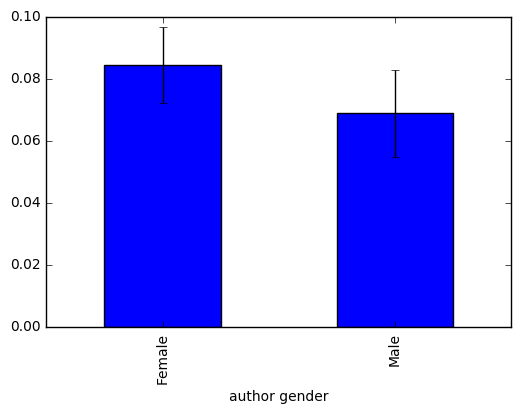

In [7]:
df['text'] = df['text'].str.lower()
sp = ['i', 'you', 'he', 'she', 'it', 'we', 'they', 'what', 'who', 'me', 'him', 'her', 'us', 'them']
pp = ['mine', 'yours', 'his', 'hers', 'ours', 'theirs']
df['pronouns'] = df['text'].str.split()
df['wc'] = df['pronouns'].apply(len)
df['num_pronouns'] = df['pronouns'].apply(lambda x: len([w for w in x if w in sp]))
df['prop_pronouns'] = df['num_pronouns']/df['wc']

grouped = df.groupby('author gender')
print(grouped['pronouns'].sum())
print(grouped['wc'].sum())
print(grouped['prop_pronouns'].mean())
grouped['prop_pronouns'].mean().plot(kind = 'bar', yerr = (grouped['prop_pronouns'].std()))
plt.show()

In [5]:
female = df[df['author gender']=="Female"]
f_text = ''.join(x for x in female['text'].tolist())
f_text_token = nltk.word_tokenize(f_text)
f_nltk = nltk.Text(f_text_token)

male = df[df['author gender']=="Male"]
m_text = ''.join(x for x in male['text'].tolist())

del df
#df = None
gc.collect()

m_text_token = nltk.word_tokenize(m_text)
m_nltk = nltk.Text(m_text_token)

#m_nltk.concordance('us')
my_var = f_nltk.similar('us')
m_nltk.similar('us')

her me you them him it the herself which annie what and all that be
his do dora say may
him them you me it that her which himself reuben the and percy work
course jeffreys this see tim be


In [3]:
import gc

gc.isenabled()
gc.collect()

0

In [6]:
print(my_var)

None
